In [5]:
#import all libraries - pandas, for data importation, np for maths, nltk - Natural Language Toolkit, re for regular expressions
import pandas as pd
import numpy as np
import nltk
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tobi.akinyemi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
#import incident file
file = pd.read_csv('incidents.csv')

#reason codes are labels for data, whilst descriptions are the inputs
labelList = list(file['reason_code'])

descList = list(file['short_description'])


In [4]:
print(labelList[0:5])
print(descList[0:5])

['Password', 'Password', 'SuccessFactors', 'Hardware', 'Hardware']
['Password reset for Peter.Darby@jdecoffee.com', 'Password reset for TimothyPhillip.Jeffries@JDEcoffee.com', 'Error in SuccessFactors for new starter onboarding', 'Unable to set up Evoko', 'Evoko, not letting me book a meeting']


In [5]:
fullCorpus = pd.DataFrame({
    'label' : labelList,
    'desc_text' : descList
})

fullCorpus.head()

,label,desc_text
0,Password,Password reset for Peter.Darby@jdecoffee.com
1,Password,Password reset for TimothyPhillip.Jeffries@JDE...
2,SuccessFactors,Error in SuccessFactors for new starter onboar...
3,Hardware,Unable to set up Evoko
4,Hardware,"Evoko, not letting me book a meeting"


No handles with labels found to put in legend.


Input has 757 rows and 2 columns
There are 30 labels [{'Security', 1}, {'Outlook', 26}, {'SuccessFactors', 6}, {24, 'Network'}, {82, 'Password'}, {'Mobile', 12}, {'IT', 7}, {'VPN', 23}, {9, 'AD'}, {'O365', 17}, {'Bitlocker', 69}, {'SalesForce', 13}, {64, 'Phishing'}, {'Printer', 25}, {'CAP', 7}, {2, 'Intune'}, {8, 'Junk'}, {24, 'Xtel'}, {24, 'Intranet'}, {'SAP', 63}, {9, 'Pheonix'}, {'TAS', 9}, {'Software', 44}, {'BI', 5}, {'Sharepoint', 23}, {'Drives', 58}, {'Hardware', 54}, {35, 'Teams'}, {9, 'MFA'}, {'Concur', 5}]
[1, 26, 6, 24, 82, 12, 7, 23, 9, 17, 69, 13, 64, 25, 7, 2, 8, 24, 24, 63, 9, 9, 44, 5, 23, 58, 54, 35, 9, 5]


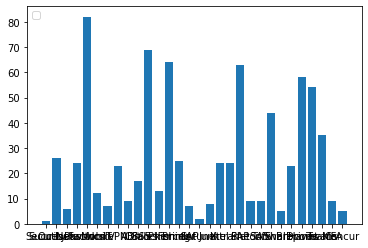

In [6]:
from matplotlib import pyplot
#Shape of the dataset
print("Input has {} rows and {} columns". format(len(fullCorpus), len(fullCorpus.columns)))

#number of labels in dataset and their distribution
labels = list({i for i in labelList})
print("There are {} labels".format(len(labels)),[{i, labelList.count(i)} for i in labels])
print([labelList.count(i) for i in labels])
labeldata = pd.DataFrame({
    'label': labels,
    'amount': [labelList.count(i) for i in labels]
})
labeldata.head()
bins = np.linspace(0,50)

pyplot.bar(labels, labeldata["amount"])

pyplot.rcParams["figure.figsize"]=40,40
pyplot.legend(loc="upper left")

pyplot.show()


In [7]:
# Tokenization of the words

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

fullCorpus["desc_text_tokenized"] = fullCorpus["desc_text"].apply(lambda x: tokenize(x.lower()))
fullCorpus.head()

,label,desc_text,desc_text_tokenized
0,Password,Password reset for Peter.Darby@jdecoffee.com,"[password, reset, for, peter, darby, jdecoffee..."
1,Password,Password reset for TimothyPhillip.Jeffries@JDE...,"[password, reset, for, timothyphillip, jeffrie..."
2,SuccessFactors,Error in SuccessFactors for new starter onboar...,"[error, in, successfactors, for, new, starter,..."
3,Hardware,Unable to set up Evoko,"[unable, to, set, up, evoko]"
4,Hardware,"Evoko, not letting me book a meeting","[evoko, not, letting, me, book, a, meeting]"


In [349]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
def remove_stop(tokened_text):
    cleaned_text = [i for i in tokened_text if i not in stop_words]
    return cleaned_text

fullCorpus["processed_desc_text"] = fullCorpus["desc_text_tokenized"].apply(lambda x: remove_stop(x))
fullCorpus.head()

,label,desc_text,desc_text_tokenized,processed_desc_text
0,Password,Password reset for Peter.Darby@jdecoffee.com,"[password, reset, for, peter, darby, jdecoffee...","[password, reset, peter, darby, jdecoffee, com]"
1,Password,Password reset for TimothyPhillip.Jeffries@JDE...,"[password, reset, for, timothyphillip, jeffrie...","[password, reset, timothyphillip, jeffries, jd..."
2,SuccessFactors,Error in SuccessFactors for new starter onboar...,"[error, in, successfactors, for, new, starter,...","[error, successfactors, new, starter, onboarding]"
3,Hardware,Unable to set up Evoko,"[unable, to, set, up, evoko]","[unable, set, evoko]"
4,Hardware,"Evoko, not letting me book a meeting","[evoko, not, letting, me, book, a, meeting]","[evoko, letting, book, meeting]"


In [4]:
#Preprocessing

from nltk.corpus import stopwords
stop_words = stopwords.words("english")
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_stem_text(text):
    #remove punctuation 
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenization of the words
    tokens = re.split('\W+', text)
    #remove stopwords
    cleaned_text = [i for i in tokens if i not in stop_words]
    #stem the words
    #stemmed_text = [ps.stem(word) for word in cleaned_text]
    #lemmitize the words
    lemmitized_text = [word for word in cleaned_text]
    return lemmitized_text
fullCorpus["clean_lam_text"] = fullCorpus["desc_text"].apply(lambda x: clean_stem_text(x.lower()))
fullCorpus.head()


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\tobi.akinyemi/nltk_data'
    - 'C:\\Users\\tobi.akinyemi\\Anaconda3\\nltk_data'
    - 'C:\\Users\\tobi.akinyemi\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tobi.akinyemi\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tobi.akinyemi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


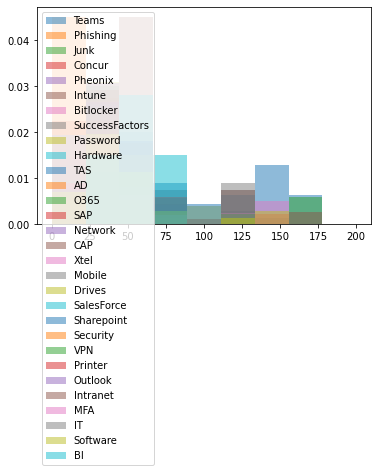

In [351]:
#feature creation and evaluation
from matplotlib import pyplot
%matplotlib inline
#create new features
def count_punc(x):
    punct_count = sum([1 for i in x if i in string.punctuation])
    return round(3/(len(x) - x.count(" ")),3)*100
#length of each type of issue
fullCorpus["text_length"] = fullCorpus["desc_text"].apply(lambda x: len(x) - x.count(" "))
#amount of punctuation in each type of issue
fullCorpus["punct_count"] = fullCorpus["desc_text"].apply(lambda x: count_punc(x))
fullCorpus.head()

#feature evaluation
bins = np.linspace(0,200,10)
for i in labels:
    pyplot.hist(fullCorpus[fullCorpus["label"]==i]["text_length"], bins, alpha=0.5, density=True, stacked=True, label=i)

pyplot.rcParams["figure.figsize"]=40,40
pyplot.legend(loc="upper left")

pyplot.show()

In [8]:
bins = np.linspace(0,50,20)
for i in labels:
    pyplot.hist(fullCorpus[fullCorpus["label"]==i]["punct_count"], bins, alpha=0.5, density=True, stacked=True, label=i)

pyplot.rcParams["figure.figsize"]=40,40
pyplot.legend(loc="upper left")

pyplot.show()

KeyError: 'punct_count'

In [362]:
#Vectorize the text so that feature vectors can be created -> numerical features.
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = stopwords.words("english")
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer() 

def clean_text(text):
    #remove punctuation 
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenization of the words
    tokens = re.split('\W+', text)
    #remove stopwords and lemmatized
    cleaned_text = [wn.lemmatize(i) for i in tokens if i not in stop_words]
    #stem the words
    #stemmed_text = [ps.stem(word) for word in cleaned_text]
    #lemmitize the words
    #lemmitized_text = [wn.lemmatize(word) for word in cleaned_text]
    return cleaned_text


tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(fullCorpus["desc_text"])
#print(x_tfidf.shape)
#print(tfidf_vect.get_feature_names())

X_features = pd.concat([fullCorpus['text_length'], fullCorpus['punct_count'],pd.DataFrame(x_tfidf.toarray())], axis=1)
#X_features = pd.DataFrame(x_tfidf.toarray())
X_features.head()



,text_length,punct_count,0,1,2,3,4,5,6,7,...,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186
0,41,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.model_selection import KFold, cross_val_score

In [11]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, fullCorpus["label"], cv=k_fold, scoring="accuracy", n_jobs=-1)

NameError: name 'X_features' is not defined

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [18]:
x_train, x_test, y_train, y_test  = train_test_split(X_features, fullCorpus["label"], test_size=0.2)

In [19]:
rf=RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(x_train, y_train)
sorted(zip(rf_model.feature_importances_, x_train.columns), reverse=True)[0:10]

[(0.05286260404346562, 425),
 (0.04355318859906023, 487),
 (0.03085865340298649, 360),
 (0.029665199740984582, 1036),
 (0.02797044044759015, 159),
 (0.027706214824754223, 529),
 (0.024812932721215607, 479),
 (0.023759403350314894, 222),
 (0.02273399011751401, 429),
 (0.02196607392312418, 576)]

In [20]:
y_pred = rf_model.predict(x_test)
precision, recall, fscore, support = score(y_test,y_pred)
print((y_pred == y_test).sum()/len(y_pred))

0.6486486486486487


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    precision, recall, fscore, support = score(y_test,y_pred)
    print("Accuracy: ", (y_pred == y_test).sum()/len(y_pred)) 

In [22]:
for n_est in [10,50, 100]:
        for depth in [10,20,30 , None]:
            train_rf(n_est, depth)

C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\si

Accuracy:  0.44144144144144143
Accuracy:  0.5855855855855856
Accuracy:  0.6126126126126126
Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5945945945945946
Accuracy:  0.6486486486486487


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6756756756756757
Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5945945945945946


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7027027027027027
Accuracy:  0.7117117117117117


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.ensemble import GradientBoostingClassifier


In [24]:
def train_gb(est, depth, lr):
    gb = GradientBoostingClassifier(n_estimators=n_est, max_depth=depth, learning_rate = lr)
    gb_model = rf.fit(x_train, y_train)
    y_pred = gb_model.predict(x_test)
    precision, recall, fscore, support = score(y_test,y_pred)
    print("Accuracy: ", (y_pred == y_test).sum()/len(y_pred)) 

In [858]:
for est in [50,100,150]:
        for depth in [3,7,11,15,100]:
            for lr in [0.01, 0.1, 1]:
                train_gb(est, depth, lr)

C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6396396396396397


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7027027027027027


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6756756756756757


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6756756756756757


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6756756756756757


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7027027027027027


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6306306306306306


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6486486486486487


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6486486486486487


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6846846846846847


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7117117117117117


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6936936936936937


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6846846846846847


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6486486486486487


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6306306306306306


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6936936936936937


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7027027027027027


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6846846846846847


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6666666666666666


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6936936936936937


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6846846846846847


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7027027027027027


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6576576576576577
Accuracy:  0.6756756756756757


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [653]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
param = {
    'n_estimators':[100,150],
    'max_depth': [7,11,15],
    'learning_rate': [0.1]
}
gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(x_tfidf, fullCorpus['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values("mean_test_score", ascending=False)[0:5]

C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,67.086572,3.652062,0.114376,0.023191,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.675676,0.657658,0.754545,0.700000,0.700000,0.697576,0.032651,1
1,39.934796,1.949495,0.085330,0.013572,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.675676,0.684685,0.754545,0.709091,0.663636,0.697527,0.032174,2
0,26.749091,0.561173,0.047418,0.008848,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.630631,0.693694,0.754545,0.709091,0.672727,0.692138,0.040852,3
3,65.421699,3.382540,0.194507,0.051980,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.639640,0.693694,0.736364,0.700000,0.681818,0.690303,0.031196,4
2,36.009320,2.006015,0.097799,0.018235,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.657658,0.693694,0.745455,0.672727,0.681818,0.690270,0.029999,5


In [25]:
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
import numpy as np
import nltk
import re
import string

#import incident file
file = pd.read_csv('incidents.csv')
#reason codes are labels for data, whilst descriptions are the inputs
labelList = list(file['reason_code'])

descList = list(file['short_description'])

#Data Frame for full text documents with labels
fullCorpus = pd.DataFrame({
    'label' : labelList,
    'desc_text' : descList
})

#Shape of the dataset
print("Input has {} rows and {} columns". format(len(fullCorpus), len(fullCorpus.columns)))

#number of labels in dataset and their distribution
labels = list({i for i in labelList})
print("There are {} labels".format(len(labels)),[{i, labelList.count(i)} for i in labels])


stop_words = stopwords.words("english")
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer() 

def clean_text(text):
    #remove punctuation 
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenization of the words
    tokens = re.split('\W+', text)
    #remove stopwords and lemmatized
    cleaned_text = [wn.lemmatize(i) for i in tokens if i not in stop_words]
    #stem the words
    #stemmed_text = [ps.stem(word) for word in cleaned_text]
    #lemmitize the words
    #lemmitized_text = [wn.lemmatize(word) for word in cleaned_text]
    return cleaned_text


#Vectorize the text so that feature vectors can be created -> numerical features.
#using TF - IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(fullCorpus["desc_text"])
#print(x_tfidf.shape)
#print(tfidf_vect.get_feature_names())

#X_features = pd.concat([fullCorpus['text_length'], fullCorpus['punct_count'],pd.DataFrame(x_tfidf.toarray())], axis=1)
X_features = pd.DataFrame(x_tfidf.toarray())
x_train, x_test, y_train, y_test  = train_test_split(X_features, fullCorpus["label"], test_size=0.1)
rf=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(x_train, y_train)



y_pred = rf_model.predict(x_test)
precision, recall, fscore, support = score(y_test,y_pred)
accuracy = (y_pred == y_test).sum()/len(y_pred)
print(accuracy)
        

def use_model(test_file):
    #rf_model = joblib.load("models.pkl")
    #import incident file
    file = pd.read_csv(test_file)   
    
    descList = list(file['short_description'])

    #Data Frame for full text documents with labels
    testCorpus = pd.DataFrame({
        'desc_text' : descList
    })
    tfidf_vect = TfidfVectorizer(analyzer=clean_text)
    x_tfidf = tfidf_vect.fit_transform(testCorpus["desc_text"])
    X2_features = pd.DataFrame(x_tfidf.toarray())
    for column in X_features.columns:
        if column not in X2_features.columns:
            X2_features[column] = 0
    #print(X_features)
    y_pred = rf_model.predict(X2_features)
    print(y_pred)
    print(testCorpus)
use_model("test_incidents.csv")

Input has 552 rows and 2 columns
There are 30 labels [{'Teams', 31}, {'Phishing', 41}, {'Junk', 6}, {4, 'Concur'}, {'Pheonix', 6}, {1, 'Intune'}, {'Bitlocker', 52}, {5, 'SuccessFactors'}, {67, 'Password'}, {'Other', 6}, {'Hardware', 38}, {'TAS', 7}, {8, 'AD'}, {'O365', 15}, {40, 'SAP'}, {'Network', 22}, {'CAP', 6}, {18, 'Xtel'}, {9, 'Mobile'}, {'Drives', 34}, {8, 'SalesForce'}, {'Sharepoint', 10}, {1, 'Security'}, {21, 'VPN'}, {'Printer', 15}, {'Outlook', 22}, {'Intranet', 17}, {'MFA', 7}, {32, 'Software'}, {3, 'BI'}]


C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobi.Akinyemi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8035714285714286
['Hardware' 'Software' 'Concur' 'Concur' 'Software' 'Network' 'Software'
 'Teams' 'Software' 'Teams' 'Software' 'Software' 'Software' 'Software'
 'Password' 'Teams' 'Xtel' 'Printer' 'Teams' 'Concur' 'Software'
 'Bitlocker' 'Software' 'Software' 'Software' 'Software' 'Software' 'VPN'
 'Outlook' 'Software' 'Software' 'Bitlocker' 'SalesForce' 'BI' 'Software'
 'Software' 'Software' 'Network' 'Network' 'Software' 'Software'
 'Intranet' 'Software' 'Software' 'Software' 'Software' 'Hardware'
 'Software' 'Bitlocker' 'Teams' 'Software' 'Junk' 'Software' 'Software'
 'Software' 'Concur' 'Software' 'Software' 'Network' 'Software'
 'Bitlocker' 'SalesForce' 'Software' 'Network' 'Teams' 'O365' 'Software'
 'Outlook' 'Drives' 'SalesForce' 'Software' 'Password' 'Xtel' 'VPN'
 'Software' 'Software' 'Software' 'Software' 'Teams' 'Software' 'VPN'
 'Outlook' 'Software' 'SAP' 'VPN' 'Software' 'Teams' 'Network' 'Teams'
 'Software' 'Software' 'Software' 'Network' 'Software' 'Bitlocker' 'Teams

In [4]:
import nltk
import pandas as pd
import re
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string
from sklearn.linear_model import SGDClassifier

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

labelList = list(file['reason_code'])

descList = list(file['short_description'])

#Data Frame for full text documents with labels
data = pd.DataFrame({
    'label' : labelList,
    'desc_text' : descList
})

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['desc_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['desc_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['desc_text']], data['label'], test_size=0.15)
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['desc_text'])
tfidf_train = tfidf_vect.transform(X_train['desc_text'])
tfidf_test = tfidf_vect.transform(X_test['desc_text'])

X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())


#gb = GradientBoostingClassifier(n_estimators=150, max_depth=None, learning_rate = 0.1)
#gb_model = gb.fit(X_train_vect, y_train)
#y_pred = gb_model.predict(X_test_vect)

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

#sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
#sgd_model = sgd.fit(X_train_vect, y_train)
#y_pred = sgd_model.predict(X_test_vect)

print('Accuracy: {}'.format(
    (y_pred==y_test).sum()/len(y_pred), 3))


def use_model(test_file):
    #rf_model = joblib.load("models.pkl")
    #import incident file
    file = pd.read_csv(test_file)   
    
    descList = list(file['short_description'][:400])

    #Data Frame for full text documents with labels
    data = pd.DataFrame({
        'desc_text' : descList
    })
    data['body_len'] = data['desc_text'].apply(lambda x: len(x) - x.count(" "))
    data['punct%'] = data['desc_text'].apply(lambda x: count_punct(x))
    
    x_tfidf = tfidf_vect.transform(data["desc_text"])
    X2_features = pd.DataFrame(x_tfidf.toarray())

    #print(X_features)
    y_pred = rf_model.predict(X2_features)
    print(y_pred)
use_model("test_incidents.csv")

Accuracy: 0.8596491228070176
['Network' 'Software' 'Bitlocker' 'Bitlocker' 'Software' 'Hardware'
 'Intranet' 'Drives' 'Software' 'Sharepoint' 'Sharepoint' 'Sharepoint'
 'Sharepoint' 'Hardware' 'Intranet' 'Sharepoint' 'Sharepoint' 'Intranet'
 'Drives' 'Bitlocker' 'VPN' 'Sharepoint' 'Printer' 'Xtel' 'Bitlocker'
 'Phishing' 'Password' 'Printer' 'Drives' 'SAP' 'Intranet' 'IT' 'SAP'
 'Xtel' 'Intranet' 'SAP' 'VPN' 'Password' 'Sharepoint' 'Software'
 'Sharepoint' 'SalesForce' 'SAP' 'O365' 'SAP' 'Hardware' 'Software' 'BI'
 'Software' 'Drives' 'Software' 'Sharepoint' 'SAP' 'SAP' 'TAS' 'Bitlocker'
 'Printer' 'Bitlocker' 'MFA' 'Hardware' 'Xtel' 'SAP' 'Intranet' 'Password'
 'Drives' 'Drives' 'Hardware' 'Teams' 'Hardware' 'SalesForce' 'Drives'
 'Software' 'Xtel' 'Intune' 'Bitlocker' 'Phishing' 'Phishing' 'Outlook'
 'Drives' 'Junk' 'Printer' 'Printer' 'Hardware' 'Outlook' 'Printer'
 'Software' 'Drives' 'Hardware' 'Drives' 'Xtel' 'Pheonix' 'SAP' 'SAP'
 'Phishing' 'Password' 'Drives' 'Sharepoint' 'Sof

In [ ]:
import os
import nltk
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import pickle
from tkinter import *
import tkinter.ttk as ttk
import numpy as np
import threading

stopwords = nltk.corpus.stopwords.words('english') #stopwords, set of words to be filtered out, so that time and space canbe saved.
ps = nltk.PorterStemmer() # A stemmer used to group together similar words, so that a general understanding of a sentence can be understood.

file = pd.read_csv("Training Data/Incidents.csv") # read in the training file
labelList = list(file['reason_code'])# create a list from the training file containing all of the the training labels
descList = list(file['short_description'])# create a list from all of the training data

data = pd.DataFrame({
    'label' : labelList,
    'body_text' : descList
}) # initialise a pandas dataframe that contains the label list and descriptions from the training data.

def count_punct(text): # function to get the percentage of punctuation used in a text.
    count = sum([1 for char in text if char in string.punctuation]) #get sum of all punctuation used. using string.punctuation
    return round(count/(len(text) - text.count(" ")), 3)*100 # get a percentage.

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" ")) #get the string length of each description - feature 1
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))#get the percentage of punctuation for each description - feature 2

def clean_text(text): #function to clean a description
    text = "".join([word.lower() for word in text if word not in string.punctuation])# remove punctuation for processing
    tokens = re.split('\W+', text)#split each description into individual tokens/words
    text = [ps.stem(word) for word in tokens if word not in stopwords]# use a stemmer to create meaning in each description and also reduce words for processing.
    return text

def use_model(filename, rf_model, ngrams, tfidf):# function for running a natural language model on a unseen model.
    print("Running Labeller") #for development - to see if the fucntion is running
    rf_model = pickle.load(open("Approved Models/"+rf_model, 'rb')) #using pickle library to load a previous model
    ngram_vect_fit = pickle.load(open("Approved Models/"+ngrams, 'rb'))#load previous n-grams vectoriser
    tfidf_vect_fit = pickle.load(open("Approved Models/"+tfidf, 'rb'))#load previous tfidf vectoriser
    file = pd.read_csv(filename, encoding_errors='ignore')  #import a unseen dataset to label
    
    descList = list(file['short_description']) #create a list of descriptions from the unseen dataset.

    
    data = pd.DataFrame({
        'desc_text' : descList
    }) #Data Frame for full text documents with labels
    
    #perform all the same preprocessing as before to get the same feature extraction as in the test set.
    data['body_len'] = data['desc_text'].apply(lambda x: len(x) - x.count(" "))
    data['punct%'] = data['desc_text'].apply(lambda x: count_punct(x))

    tfidf_test = tfidf_vect_fit.transform(data['desc_text']) #tfidf vectoriser, to extract features from the text - feature 3
    X_counts_test = ngram_vect_fit.transform(data['desc_text'])#ngram vectoriser, to extract feature from the text - feature 4

    X_test_vect2 = pd.concat([data[['body_len', 'punct%']].reset_index(drop=True),pd.DataFrame(X_counts_test.toarray()),
               pd.DataFrame(tfidf_test.toarray())], axis=1) #create a matrix of all of the features for the model to process

    X_test_vect2 = np.nan_to_num(X_test_vect2) 
    y_pred2 = rf_model.predict(X_test_vect2) #using the previous rf model, predict the labels for the unseen data using the matrix of it's features.
    
    return y_pred2 # return the labels

def test_model(descriptions, rf_model, ngrams, tfidf): #function for running the model but only on user input.
    #import incident file
    print("Running Labeller")
    rf_model = pickle.load(open("Approved Models/"+rf_model, 'rb'))
    ngram_vect_fit = pickle.load(open("Approved Models/"+ngrams, 'rb'))
    tfidf_vect_fit = pickle.load(open("Approved Models/"+tfidf, 'rb'))
    #file = pd.read_csv(filename)   
    
    descList = [descriptions]

    #Data Frame for full text documents with labels
    data = pd.DataFrame({
        'desc_text' : descList
    })
    
    data['body_len'] = data['desc_text'].apply(lambda x: len(x) - x.count(" "))
    data['punct%'] = data['desc_text'].apply(lambda x: count_punct(x))

    tfidf_test = tfidf_vect_fit.transform(data['desc_text'])
    X_counts_test = ngram_vect_fit.transform(data['desc_text'])

    X_test_vect2 = pd.concat([data[['body_len', 'punct%']].reset_index(drop=True),pd.DataFrame(X_counts_test.toarray()),
               pd.DataFrame(tfidf_test.toarray())], axis=1)

    X_test_vect2 = np.nan_to_num(X_test_vect2)
    y_pred2 = rf_model.predict(X_test_vect2)
    return y_pred2

def update_gui_test_return(description, test_models, errorLbls, textbox):
    if Error_handler([test_models],errorLbls): # checks if any errors have been found
        gui_test_val = test_model(description,test_models.get()+".pkl",test_models.get()+".pkl_ngrams.pkl",test_models.get()+".pkl_tfidf.pkl") #run test user input function
        textbox.config(state=NORMAL) #allow textbox to be editable
        textbox.delete(1.0, "end")# clear the textbox
        textbox.insert("end", gui_test_val[0])#set the label for the textbox
        textbox.config(state=DISABLED)#do not allow textbox to be editable
    else:
        return

def label_reason_codes(filename, model, errorLbls):
    if Error_handler([filename, model],errorLbls): #checks if any errors have been found in user input
        print("Actioning: Label")
        filename = filename.get()+".csv" # get the file to import in order to label the reason codes

        model = model.get()+".pkl" #get the file name for the model to use

        ngrams = model +"_ngrams.pkl"#get the file name of the ngram vectoriser to use for the model above

        tfidf = model +"_tfidf.pkl"#get the filename of the tfidf vectoriser to use for the model above

        reason_codes = use_model("Reports to Label/"+filename, model, ngrams, tfidf)#return the label list 

        file = pd.read_csv("Reports to Label/"+filename, encoding_errors='ignore')# open the file so you can edit it to store it again

        file.columns =["u_site_id","number","u_first_name","u_last_name","short_description","opened_at","active",
                       "additional_assignee_list","approval","approval_set","approval_history","assignment_group.parent",
                       "business_duration","location","severity"]
                      #get the columns
        file.insert(5,"reason codes", reason_codes)# add the column reason codes

        file.to_csv("Labelled Reports/"+filename)#add reason codes into the new column and save the file in a new location.
        #print(reason_codes)
    else:
        return
    
def train_rf(n_est, depth, accuracy_thres):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)# random forest classifier - initalise model
    rf_model = rf.fit(X_train_vect, y_train)# fit the features matrix and labels together
    y_pred = rf_model.predict(X_test_vect)#predict a label using testing data
    accuracy = (y_pred == y_test).sum()/len(y_pred)# show the accuracy of the model
    if accuracy >=(accuracy_thres/100) and accuracy < 0.85: # save the model if the prediction within the right range
        filename = str(round(accuracy,3))+"_"+str(depth)+"_"+str(n_est)+'.pkl'
        filename2 = filename+'_ngrams.pkl'
        filename3 = filename+'_tfidf.pkl'
        print(filename, filename2, filename3)
        pickle.dump(rf_model, open("Testing Models\Latest Models/"+filename, 'wb')) # using pickle library to save the models
        pickle.dump(ngram_vect_fit, open("Testing Models\Latest Models/"+filename2, 'wb'))
        pickle.dump(tfidf_vect_fit, open("Testing Models\Latest Models/"+filename3, 'wb'))
    
def best_model(epochs, accuracy_thres, progress_bar, label):
    for i in range(epochs):
        print("Iteration: ",i)
        for n_est in [50,100,150,200,250,300]: # change the random forest n estimators parameter
            for depth in [10,20,30,40,50,60,70,80,None]: # change the max depth of the random forest
                train_rf(n_est, depth, accuracy_thres)
        root.update_idletasks()
        progress_bar['value'] +=1 
        label["text"] = "Completion: "+ str((progress_bar['value']/epochs) *100)+"%" #display a progress bar for the user.
    hide_widget(progress_bar)# when done delete the progress bar.
    
                
def update_source(source, error_lbl, accuracy_thres, epochs):
    #add error handler
    if Error_handler([source],error_lbl):
    #add new source to main source
        source = source.get()
        main_source = pd.read_csv("Incidents.csv", encoding_errors='ignore')
        new_source = pd.read_csv("Training Data/"+source+".csv",encoding_errors='ignore')
        main_source.append(new_source)
        main_source = main_source.drop_duplicates().set_index("u_site_id")
        main_source.to_csv("Training Data/Incidents.csv",encoding_errors='ignore')
    else:
        return
    
    update_progress = ttk.Progressbar(frame, orient=HORIZONTAL, length=200, maximum = epochs, mode='determinate')
    update_progress.grid(row=7,column=0,pady=10,sticky="e")
    current_widgets.append(update_progress)
    
    progress_lbl =ttk.Label(frame, text="Completion: "+ str(update_progress['value'])+"%", font=(font_type,font_size_norm-5))
    progress_lbl.grid(row=8,column=0, pady=10, columnspan=3,sticky="n")
    current_widgets.append(progress_lbl)
    
    best_model(epochs, accuracy_thres, update_progress, progress_lbl)
    

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

ngram_vect = CountVectorizer(ngram_range=(1,2))
ngram_vect_fit = ngram_vect.fit(X_train['body_text'])

X_counts_train = ngram_vect_fit.transform(X_train['body_text'])
X_counts_test = ngram_vect_fit.transform(X_test['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])


X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), pd.DataFrame(X_counts_train.toarray()),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), pd.DataFrame(X_counts_test.toarray()),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

print('Accuracy: {}'.format(
    (y_pred==y_test).sum()/len(y_pred)))

#label_reason_codes("Feb.csv","0.803_80_250.pkl","0.803_80_250.pkl_ngrams.pkl","0.803_80_250.pkl_tfidf.pkl")
#best_model()

#GUI

#Configurations
font_type = 'Helvetica bold'
font_size_hdr = 35
font_size_norm = 15

root = Tk()
root.title("Reason Code Labeller")

frame = ttk.Frame(root)
frame.grid(row=0, column=0, sticky="nsew")

root.columnconfigure([0,1], minsize=133)
root.rowconfigure([0,6], minsize=200)
root.maxsize(height=500, width=500)

current_widgets=[]
menubar = Menu(frame)
filemenu = Menu(menubar, tearoff=0)
filemenu.add_command(label="Home", command=lambda : run_home_screen())
filemenu.add_command(label="Model Tester", command=lambda : run_model_tester())
filemenu.add_command(label="Update Models", command=lambda : run_model_updater())
filemenu.add_separator()
filemenu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=filemenu)

helpmenu = Menu(menubar, tearoff=0)
helpmenu.add_command(label="About...", command=lambda:help_screen())
menubar.add_cascade(label="Help", menu=helpmenu)

root.config(menu=menubar)


def hide_widget(widget):
    widget.grid_remove()
    
def clear_widgets():
    for i in current_widgets:
        hide_widget(i)
    print("hidden widgets")
        
#dropwdown list for number of models
def get_models():
    models=set()
    for file in os.listdir("Approved Models"):
        if file.endswith(".pkl"):
            models.add(file[:file.index(".p")])
    return list(models)


#dropwdown list for spreadsheet
def get_spreadsheet(sheetType):
    files=set()
    if sheetType == "Reports to Label":
        dir_files = os.listdir("Reports to Label")
    elif sheetType == "Training Data":
        dir_files = os.listdir("Training Data")
    else:
        return ["None Available"]
    for file in dir_files:
        if file.endswith(".csv"):
            files.add(file[:file.index(".c")])
    if len(list(files)) <1:
        Error = "Please add sheets to "+ sheetType+" in order to continue!"
        return ["None Available"]
    else:
        return list(files)


def run_home_screen():
    clear_widgets()
    
    MainTitle = ttk.Label(frame, text="Incident Labeller", font=(font_type,font_size_hdr))
    MainTitle.grid(row=0,column=0,sticky="n")
    
    linespace =ttk.Label(frame, text=" ", wraplength=500, font=(font_type,font_size_norm+2))
    linespace.grid(row=1,column=0, pady=30, sticky="w")
    current_widgets.append(linespace)
    
    SltModelText =ttk.Label(frame, text="Select Model", font=(font_type,font_size_norm))
    SltModelText.grid(row=2,column=0, pady=10,sticky="w")
    current_widgets.append(SltModelText)

    SltSpreadSheetText = ttk.Label(frame, text="Select Spreadsheet", font=(font_type,font_size_norm))
    SltSpreadSheetText.grid(row=4,column=0,pady=10,sticky="w")
    current_widgets.append(SltSpreadSheetText)
    
    var_drop = StringVar(frame)
    models = get_models()
    var_drop.set(models[0])

    model_drop = ttk.Combobox(frame, textvariable = var_drop)
    model_drop['values'] = models
    model_drop.grid(row=2,column=1,pady=10,sticky="w")
    current_widgets.append(model_drop)
    
    model_drop_Err  =ttk.Label(frame, text="", font=(font_type,font_size_norm-5))
    model_drop_Err.grid(row=3,column=1,pady=10,sticky="w")
    current_widgets.append(model_drop_Err )
    
    var_drop2 = StringVar(frame)
    sheets = get_spreadsheet("Reports to Label")
    var_drop2.set(sheets[0])

    sheet_drop = ttk.Combobox(frame, textvariable = var_drop2)
    sheet_drop['values'] = sheets
    sheet_drop.grid(row=4,column=1,pady=10,sticky="w")
    current_widgets.append(sheet_drop)
    
    sheet_drop_Err  =ttk.Label(frame, text="", font=(font_type,font_size_norm-5))
    sheet_drop_Err.grid(row=5,column=1,pady=10,sticky="w")
    current_widgets.append(sheet_drop_Err)
    
    RunButton = ttk.Button(frame, text="RUN", command=lambda : threading.Thread(target=label_reason_codes,args=(sheet_drop,model_drop,[sheet_drop_Err,model_drop_Err])).start(), width=20)
    RunButton.grid(row=7,column=1,pady=10,sticky="w")
    current_widgets.append(RunButton)
    
def run_model_tester():
    #clear the screen add new buttons
    clear_widgets()
    
    #new screen for testing accuracy and creating new models
    linespace =ttk.Label(frame, text=" ", wraplength=500, font=(font_type,font_size_norm+2))
    linespace.grid(row=1,column=0, pady=30, sticky="w")
    current_widgets.append(linespace)
    
    SelectTestModel =ttk.Label(frame, text="Select Model", font=(font_type,font_size_norm))
    SelectTestModel.grid(row=2,column=0,sticky="w")
    current_widgets.append(SelectTestModel)
    
    TestDescription = ttk.Label(frame, text="Test Description", font=(font_type,font_size_norm))
    TestDescription.grid(row=4,column=0,sticky="w")
    current_widgets.append(TestDescription)
    
    TestReturn = ttk.Label(frame, text="Reason Code", font=(font_type,font_size_norm))
    TestReturn.grid(row=6,column=0,sticky="w")
    current_widgets.append(TestReturn)
    
    reason_textbox = Text(frame, "", height=1,width=17)
    reason_textbox.grid(row=6,column=1,sticky="w")
    reason_textbox.config(state=DISABLED)
    current_widgets.append(reason_textbox)
    
    var_drop = StringVar(frame)
    test_models = get_models()
    var_drop.set(test_models[0])

    test_model_drop = ttk.Combobox(frame, textvariable = var_drop)
    test_model_drop['values'] = test_models
    test_model_drop.grid(row=2,column=1,sticky="w")
    current_widgets.append(test_model_drop)
    
    test_model_Err  =ttk.Label(frame, text="", font=(font_type,font_size_norm-5))
    test_model_Err.grid(row=3,column=1,sticky="w")
    current_widgets.append(test_model_Err )
    
    test_textbox = Text(frame,"", height=8,width=30)
    test_textbox.grid(row=5,column=0,sticky="w")
    current_widgets.append(test_textbox)
    
    Run_testButton = ttk.Button(frame, text="TEST", command=lambda : threading.Thread(target=update_gui_test_return, args=(test_textbox.get("1.0", "end"), test_model_drop, [test_model_Err], reason_textbox)).start(), width=20)
    Run_testButton.grid(row=5,column=1,sticky="w")
    current_widgets.append(Run_testButton)

def run_model_updater():
    clear_widgets()
    linespace =ttk.Label(frame, text=" ", wraplength=500, font=(font_type,font_size_norm+2))
    linespace.grid(row=1,column=0, pady=30, sticky="w")
    current_widgets.append(linespace)
    
    NewDataLbl =ttk.Label(frame, text="Select data to add to main Source: ", font=(font_type,font_size_norm))
    NewDataLbl.grid(row=2,column=0,pady=0,sticky="w")
    current_widgets.append(NewDataLbl)
    
    NewDataErr =ttk.Label(frame, text="", font=(font_type,font_size_norm-5))
    NewDataErr.grid(row=3,column=1,pady=10,sticky="w")
    current_widgets.append(NewDataErr)
    
    var_drop = StringVar(frame)
    sheets = get_spreadsheet("Training Data")
    var_drop.set(sheets[0])
    
    sheet_drop = ttk.Combobox(frame, textvariable = var_drop)
    sheet_drop['values'] = sheets
    sheet_drop.grid(row=2,column=1,pady=0,sticky="w")
    current_widgets.append(sheet_drop)
    
    AccuracyLbl = ttk.Label(frame, text="Select accuracy threshold: ", font=(font_type,font_size_norm))
    AccuracyLbl.grid(row=4,column=0,pady=10,sticky="w")
    current_widgets.append(AccuracyLbl)
    
    Accuracy_range = Scale(frame,from_=60,to=100,orient=HORIZONTAL,showvalue=True)
    Accuracy_range.set(70)
    Accuracy_range.grid(row=4,column=1,pady=10,sticky="w")
    current_widgets.append(Accuracy_range)
    
    NoOfTestsLbl = ttk.Label(frame, text="Number of Tests: ", font=(font_type,font_size_norm))
    NoOfTestsLbl.grid(row=5,column=0,pady=10,sticky="w")
    current_widgets.append(NoOfTestsLbl)
    
    Tests_range = Scale(frame,from_=0,to=1000,resolution=50,orient=HORIZONTAL,showvalue=True)
    Tests_range.set(50)
    Tests_range.grid(row=5,column=1,pady=10,sticky="w")
    current_widgets.append(Tests_range)
    
    
    update_modelBtn = ttk.Button(frame, text="UPDATE", command=lambda :threading.Thread(target= update_source,args=(sheet_drop,[NewDataErr], Accuracy_range.get(),Tests_range.get())).start(), width=20)
    update_modelBtn.grid(row=6,column=1,pady=10,sticky="w")
    current_widgets.append(update_modelBtn)
    
def help_screen():
    clear_widgets()
    
    text1= "To run the incidents reason code labeller, first select the model you would like to use. The first value shows the accuracy of the model. Then select the incident excel sheet that you would like to label. Then hit run."
    
    text2="To run the incidents model tester, first select the model that you would like to test. Then enter a issue description in the available input box, try to make it sound like you would if you were actaully raising an issue on the helpdesk. Then hit test."
    
    text3="To run the model updater, first select the new source of data that you would like to add to the training data. Then select the minimum accuracy you would like the models to be. Then select the number of times you would like to train the data. Finally hit update."
    #help for running of the model.
    linespace =ttk.Label(frame, text=" ", wraplength=500, font=(font_type,font_size_norm+2))
    linespace.grid(row=1,column=0,sticky="w")
    current_widgets.append(linespace)
    
    runmodelhelp =ttk.Label(frame, text="Run Model", wraplength=500, font=(font_type,font_size_norm+2))
    runmodelhelp.grid(row=2,column=0,sticky="w")
    current_widgets.append(runmodelhelp)
    
    runmodeldetails =ttk.Label(frame, text=text1, wraplength=500, font=(font_type,font_size_norm-2))
    runmodeldetails.grid(row=3,column=0,sticky="w")
    current_widgets.append(runmodeldetails)
    
    #help for running of the model tester.
    modeltesthelp =ttk.Label(frame, text="Test Models", wraplength=500, font=(font_type,font_size_norm+2))
    modeltesthelp.grid(row=4,column=0,sticky="w")
    current_widgets.append(modeltesthelp)
    
    modeltestdetails =ttk.Label(frame, text=text2, wraplength=500, font=(font_type,font_size_norm-2))
    modeltestdetails.grid(row=5,column=0,sticky="w")
    current_widgets.append(modeltestdetails)
    
    #help for running of the model updater.
    updatemodelhelp =ttk.Label(frame,text="Update Model", wraplength=500, font=(font_type,font_size_norm+2))
    updatemodelhelp.grid(row=6,column=0,sticky="w")
    current_widgets.append(updatemodelhelp)
    
    updatemodeldetails =ttk.Label(frame,text=text3, wraplength=500, font=(font_type,font_size_norm-2))
    updatemodeldetails.grid(row=7,column=0,sticky="w")
    current_widgets.append(updatemodeldetails)
    
    
#create an error handler function + general handler
def Error_handler(check_inputs, Err_labels):
    for i in range(len(check_inputs)):
        if check_inputs[i].get() == "" or check_inputs[i].get() == "None Available" :
            Err_labels[i]["foreground"] = "red"
            Err_labels[i]["text"]="Error: Please fill in Input"
        else:
            Err_labels[i]["text"]=""
    if all(i.get() != "" for i in check_inputs):
        print("Passed Errors")
        return True
    print("Encountered Error")
    return False
#update_source("March",[], 70,2)
run_home_screen()

root.mainloop()

C:\Users\tobi.akinyemi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tobi.akinyemi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 0.7960526315789473
hidden widgets
Passed Errors
Actioning: Label
Running Labeller


C:\Users\tobi.akinyemi\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\tobi.akinyemi\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\tobi.akinyemi\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.24.1 when using version 1.0.2. This might l

In [6]:
#Unit Testing Incident_Identifier
import unittest

from tkinter import *
import tkinter.ttk as ttk

currentModels = ["0.82_30_50","0.803_80_250","0.868_70_100"]
    
currentSpreadSheets = ["Feb","incident(15)","March"]
    
currentSpreadSheets2 = ["incident(15)","March"]

root = Tk()
frame = ttk.Frame(root)
runmodeldetails =ttk.Label(frame, text="text1", wraplength=500)
Err_labels = [runmodeldetails]

var_drop = StringVar(frame)
sheets = ["1","2","3"]

class IncidentsTests(unittest.TestCase):
    
    def test_count_punct(self):
        self.assertEqual(int(count_punct("hi.")), 33, "Should be 33")
    
    def test_clean_text(self):
        self.assertEqual(clean_text("The laptop is broken"), ['laptop','broken'], "['laptop','broken']")
        
    def test_get_models(self):
        self.assertEqual(get_models().sort(), currentModels.sort())
        
    
    def test_get_spreadsheets(self):
        self.assertEqual(get_spreadsheet("Reports to Label").sort(), currentSpreadSheets.sort())
        
    def test_get_spreadsheets2(self):
        self.assertEqual(get_spreadsheet("Labelled Reports").sort(), currentSpreadSheets2.sort())
        
    def test_model(self):
        self.assertEqual(test_model("My laptop screen is damaged.", "0.803_80_250.pkl","0.803_80_250.pkl_ngrams.pkl","0.803_80_250.pkl_tfidf.pkl"), ["Hardware"], "Should be Hardware")
        self.assertEqual(test_model("I can't connect to the internet.", "0.803_80_250.pkl","0.803_80_250.pkl_ngrams.pkl","0.803_80_250.pkl_tfidf.pkl"), ["Network"], "Should be Network")
    
    def test_error_handler_pass(self):
        var_drop.set(sheets[0])

        sheet_drop = ttk.Combobox(frame, textvariable = var_drop)
        sheet_drop['values'] = sheets
        self.assertEqual(Error_handler([sheet_drop], Err_labels), True, "Should be True")
    
    def test_error_handler_fail(self):
        var_drop.set("")

        sheet_drop = ttk.Combobox(frame, textvariable = var_drop)
        sheet_drop['values'] = sheets
        self.assertEqual(Error_handler([sheet_drop], Err_labels), False, "Should be False")
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
#test 1-

EEEEEEEE
ERROR: test_clean_text (__main__.IncidentsTests)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\tobi.akinyemi\AppData\Local\Temp\ipykernel_22416\1491580529.py", line 27, in test_clean_text
    self.assertEqual(clean_text("The laptop is broken"), ['laptop','broken'], "['laptop','broken']")
NameError: name 'clean_text' is not defined

ERROR: test_count_punct (__main__.IncidentsTests)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\tobi.akinyemi\AppData\Local\Temp\ipykernel_22416\1491580529.py", line 24, in test_count_punct
    self.assertEqual(int(count_punct("hi.")), 33, "Should be 33")
NameError: name 'count_punct' is not defined

ERROR: test_error_handler_fail (__main__.IncidentsTests)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\tobi.akinyemi\AppData